# Accessing the Dataset

In [222]:
import numpy as np
import pandas as pd
import os
import string
import re

In [224]:
train=pd.read_csv("tweets_labelled_09042020_16072020.csv",sep=";")

In [226]:
train.shape

(5000, 4)

In [228]:
train.head()

,id,created_at,text,sentiment
0,77522,2020-04-15 01:03:46+00:00,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",positive
1,661634,2020-06-25 06:20:06+00:00,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,negative
2,413231,2020-06-04 15:41:45+00:00,Net issuance increases to fund fiscal programs...,positive
3,760262,2020-07-03 19:39:35+00:00,RT @bentboolean: How much of Amazon's traffic ...,positive
4,830153,2020-07-09 14:39:14+00:00,$AMD Ryzen 4000 desktop CPUs looking ‘great’ a...,positive


# Preprocessing the Dataset

In [231]:
train["sentiment"].unique()

array(['positive', 'negative', 'neutral', nan], dtype=object)

In [233]:
train.fillna(method="ffill",inplace=True)

In [235]:
train["sentiment"].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

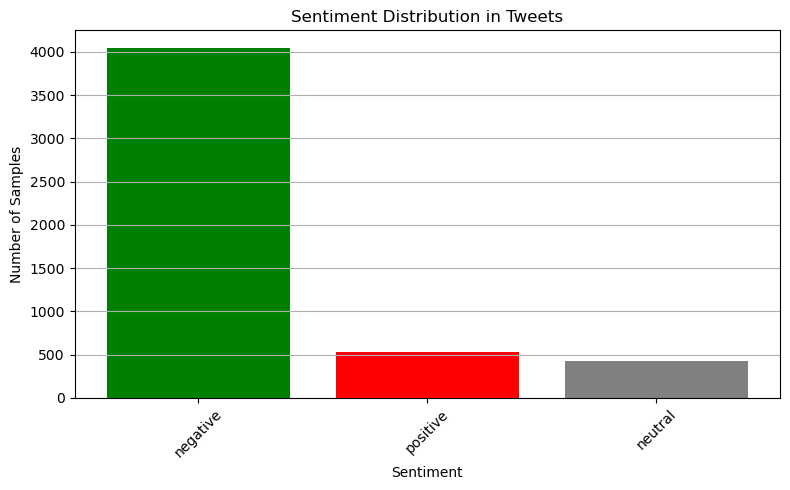

In [237]:
# Count the occurrences of each sentiment category
sentiment_counts = train['sentiment'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution in Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()


In [239]:
train.isnull().sum()

id            0
created_at    0
text          0
sentiment     0
dtype: int64

In [241]:
def getLabel(x):
    if x=='positive':
        return 1
    elif x=='negative':
        return -1
    else:
        return 0
train["sentiment"]=train["sentiment"].apply(lambda x: getLabel(x))
train.drop(["id","created_at"],axis=1,inplace=True)

In [243]:
train["text"]=train["text"].apply(lambda x:re.sub('[^a-zA-Z]',' ',x).lower())

In [244]:
train.head()

,text,sentiment
0,rt robertbeadles yo enter to win mona...,1
1,srilanka surcharge on fuel removed the su...,-1
2,net issuance increases to fund fiscal programs...,1
3,rt bentboolean how much of amazon s traffic ...,1
4,amd ryzen desktop cpus looking great a...,1


# Applying Count Vectorizer

In [248]:
x_train=train["text"][:4000]
y_train=train["sentiment"][:4000]
x_val=train["text"][4000:]
y_val=train["sentiment"][4000:]

In [250]:
from sklearn.feature_extraction.text import CountVectorizer

In [252]:
cv=CountVectorizer(ngram_range=(1,1))

In [254]:
x_train=cv.fit_transform(x_train)
x_val=cv.transform(x_val)

In [255]:
print(x_train)

  (0, 10881)	1
  (0, 10794)	1
  (0, 14541)	1
  (0, 3861)	1
  (0, 12761)	1
  (0, 14025)	1
  (0, 8145)	1
  (0, 12776)	1
  (0, 13356)	1
  (0, 11940)	1
  (0, 7682)	1
  (0, 2636)	1
  (0, 473)	1
  (0, 13970)	1
  (0, 13888)	1
  (0, 1778)	1
  (0, 7141)	1
  (0, 4737)	1
  (0, 12560)	1
  (0, 9901)	1
  (0, 10626)	1
  (0, 13849)	1
  (0, 13576)	1
  (1, 4737)	1
  (1, 11806)	1
  :	:
  (3999, 14049)	1
  (3999, 1727)	1
  (3999, 5805)	1
  (3999, 2268)	1
  (3999, 4594)	1
  (3999, 1684)	1
  (3999, 8247)	1
  (3999, 13566)	1
  (3999, 7950)	1
  (3999, 6416)	1
  (3999, 4112)	1
  (3999, 12433)	1
  (3999, 8827)	1
  (3999, 12419)	1
  (3999, 11640)	1
  (3999, 9657)	1
  (3999, 1464)	1
  (3999, 3173)	1
  (3999, 6233)	1
  (3999, 13151)	1
  (3999, 839)	1
  (3999, 14618)	1
  (3999, 12437)	1
  (3999, 7951)	1
  (3999, 817)	1


In [258]:
print(x_val)

  (0, 473)	1
  (0, 491)	1
  (0, 759)	1
  (0, 2101)	1
  (0, 2268)	1
  (0, 4954)	1
  (0, 4955)	1
  (0, 5076)	1
  (0, 5287)	1
  (0, 5748)	1
  (0, 5805)	1
  (0, 5908)	1
  (0, 6305)	1
  (0, 7402)	1
  (0, 7707)	1
  (0, 8154)	1
  (0, 10612)	1
  (0, 11541)	1
  (0, 11783)	1
  (0, 11976)	1
  (0, 12427)	1
  (0, 12533)	1
  (0, 13697)	1
  (0, 14049)	1
  (1, 393)	1
  :	:
  (997, 13753)	1
  (997, 14049)	1
  (997, 14113)	1
  (997, 14362)	1
  (997, 14734)	1
  (998, 44)	1
  (998, 1536)	1
  (998, 2268)	2
  (998, 2573)	1
  (998, 3214)	1
  (998, 3723)	1
  (998, 5287)	1
  (998, 5805)	2
  (998, 6406)	1
  (998, 6688)	1
  (998, 9467)	1
  (998, 12533)	1
  (998, 12572)	1
  (999, 2268)	1
  (999, 2514)	1
  (999, 5805)	1
  (999, 6091)	1
  (999, 11184)	1
  (999, 11293)	1
  (999, 11976)	1


In [260]:
from sklearn.naive_bayes import MultinomialNB

In [262]:
nb=MultinomialNB()
nb.fit(x_train,y_train)

MultinomialNB()

In [264]:
nb.score(x_val,y_val)

0.995

# Predicting the sentiment for a new Tweet

In [267]:
def clean_tweet(data, preserve_chars=None):
    tweet_series = pd.Series(data['tweet'])

    # Create the regex pattern to preserve characters if provided
    if preserve_chars:
        preserve_pattern = ''.join([re.escape(char) for char in preserve_chars])
        pattern = f'[^a-zA-Z{preserve_pattern}]'
    else:
        pattern = '[^a-zA-Z]'

    # Apply cleaning on the tweet series
    cleaned_series = tweet_series.apply(lambda x: re.sub(pattern, ' ', x).lower())

    return cleaned_series


In [269]:
# Example usage
data = {'tweet': ["$DXY is breaking out of a falling wedge to start October makes sense that we're seeing #stocks and #crypto react bearishly to USD strength. Sweep of the 101.90 highs incoming IMO.$BTC $ETH"]}

# Clean the tweet while preserving '$' and '#'
cleaned_tweet = clean_tweet(data) #  preserve_chars=['$', '#']

In [271]:
cleaned_tweet

0     dxy is breaking out of a falling wedge to sta...
dtype: object

In [273]:
cleaned_tweet = cv.transform(cleaned_tweet)

In [275]:
y_pred=nb.predict(cleaned_tweet)

In [277]:
y_pred

array([-1], dtype=int64)

# Frequency of Mentions

In [280]:
from collections import Counter

In [282]:
# Example: Specific stocks or trends to check
stocks = ['aapl', 'tsla', 'googl', 'amzn', 'amd'] # put the stocks in smallcase ONLY!!!

# Combine all tweets into a single text for counting
all_tweets = ' '.join(train["text"].tolist())

# Split the text into words
words = all_tweets.split()

# Count frequency of each stock symbol in the tweets
stock_mentions = Counter(word for word in words if word in stocks)

# Display the frequency of mentions
print(stock_mentions)

Counter({'aapl': 667, 'amzn': 571, 'tsla': 364, 'googl': 139, 'amd': 109})


In [284]:

# Example: Specific stocks or trends to check (in lowercase)
stocks = ['amzn']

# Combine all tweets into a single text for counting
all_tweets = ' '.join(train["text"].tolist())

# Split the text into words
words = all_tweets.split()

# Count frequency of each stock symbol in the tweets
stock_mentions = Counter(word for word in words if word in stocks)

# Initialize a dictionary to store sentiment counts for each stock
sentiment_counts = {stock: {'positive': 0, 'negative': 0, 'neutral': 0} for stock in stocks}

# Count sentiments for each stock
for stock in stock_mentions.keys():
    # Filter tweets that mention the stock
    stock_tweets = train[train['text'].str.contains(stock, case=False, na=False)]
    
    # Count sentiments in those tweets
    for sentiment in stock_tweets['sentiment']:
        if sentiment == 1:
            sentiment_counts[stock]['positive'] += 1
        elif sentiment == -1:
            sentiment_counts[stock]['negative'] += 1
        elif sentiment == 0:
            sentiment_counts[stock]['neutral'] += 1

# Display the sentiment counts for each stock
print(sentiment_counts)


{'amzn': {'positive': 66, 'negative': 446, 'neutral': 49}}


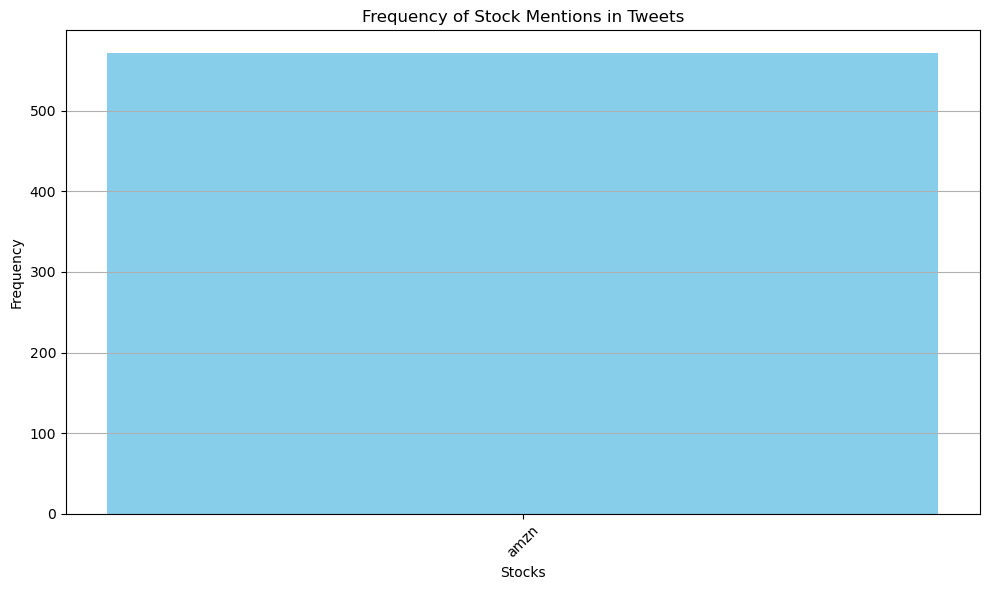

In [286]:
import matplotlib.pyplot as plt

# Convert the Counter object to a dictionary
stock_mentions_dict = dict(stock_mentions)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(stock_mentions_dict.keys(), stock_mentions_dict.values(), color='skyblue')
plt.title('Frequency of Stock Mentions in Tweets')
plt.xlabel('Stocks')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()


# Topic Modelling

In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import textwrap

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [291]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SAUMITRA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [292]:
stops = set(stopwords.words('english'))

In [295]:
vectorizer = CountVectorizer(stop_words=list((stops)))

In [296]:
X = vectorizer.fit_transform(train["text"])

In [298]:
lda = LatentDirichletAllocation(
    n_components=10, # default: 10
    random_state=12345,
)

In [301]:
lda.fit(X) # For Topic by word

LatentDirichletAllocation(random_state=12345)

In [302]:
def plot_top_words(model, feature_names, n_top_words=10):
  fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
  axes = axes.flatten()
  for topic_idx, topic in enumerate(model.components_):
    top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
    top_features = [feature_names[i] for i in top_features_ind]
    weights = topic[top_features_ind]

    ax = axes[topic_idx]
    ax.barh(top_features, weights, height=0.7)
    ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
    ax.invert_yaxis()
    ax.tick_params(axis="both", which="major", labelsize=20)
    for i in "top right left".split():
        ax.spines[i].set_visible(False)
    fig.suptitle('LDA', fontsize=40)

  plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
  plt.show()

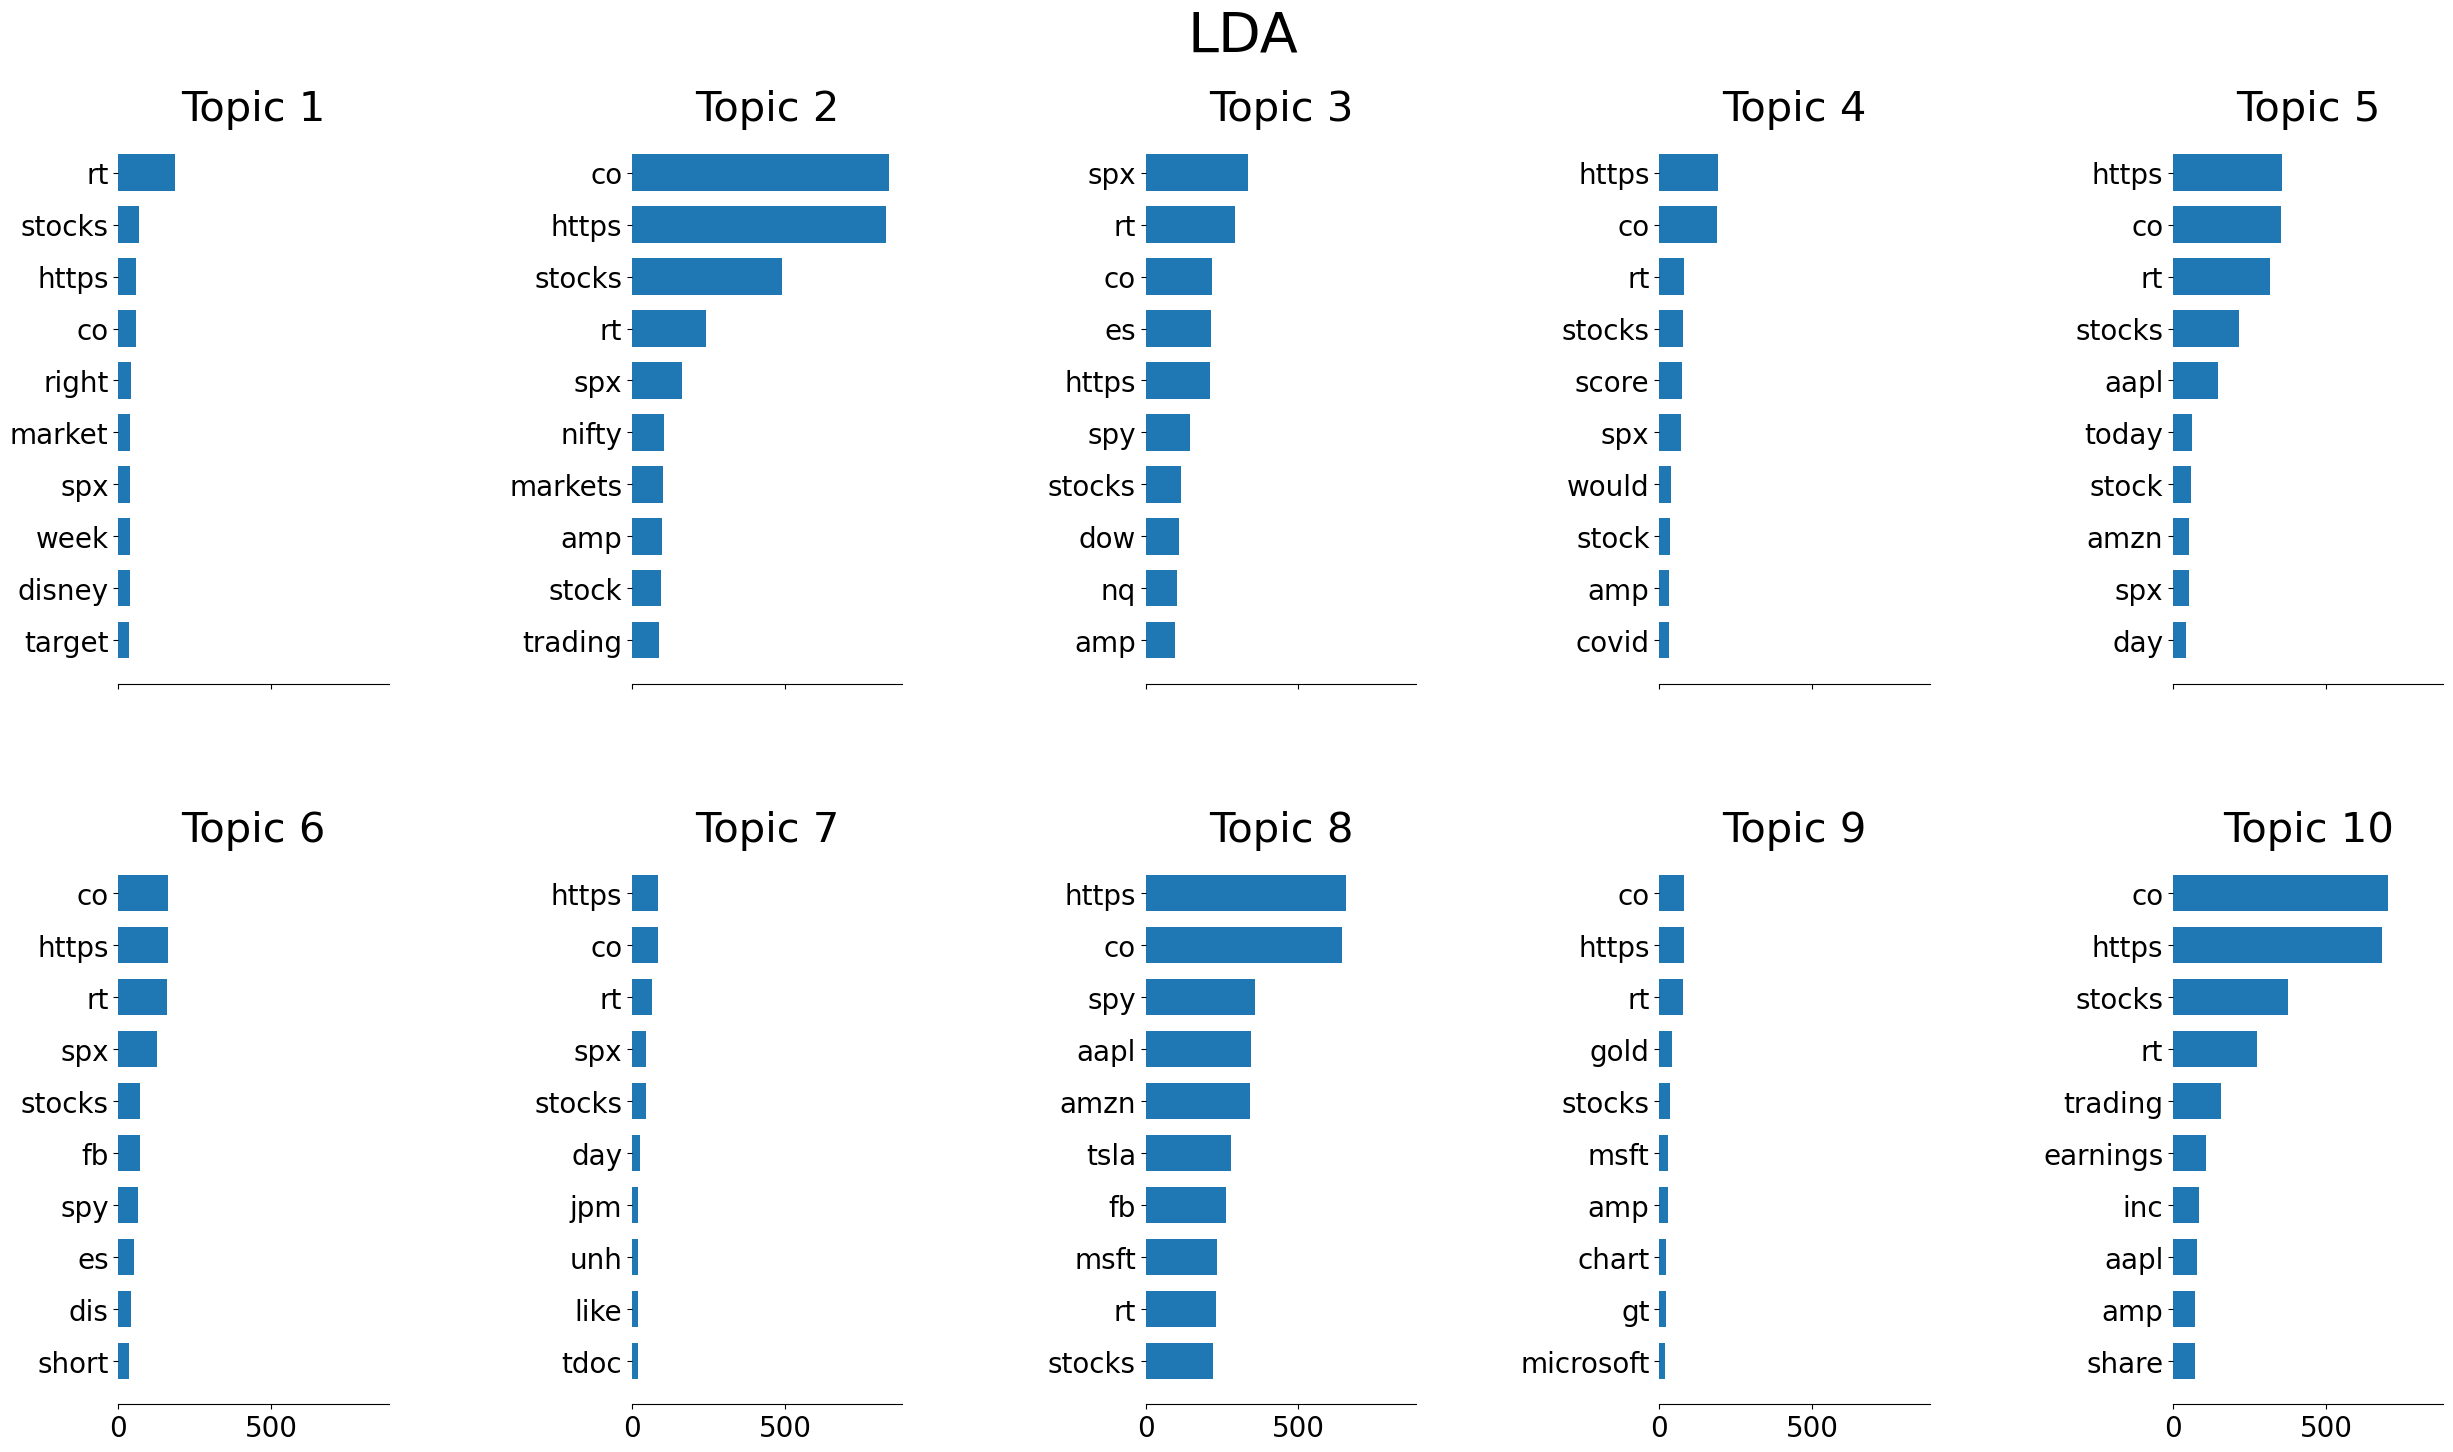

In [303]:
feature_names = vectorizer.get_feature_names_out()
plot_top_words(lda, feature_names);

# Prediction of Stocks on the basis of Tweets

In [308]:

# Example: Specific stocks or trends to check (in lowercase)
stocks = ['amzn']

# Combine all tweets into a single text for counting
all_tweets = ' '.join(train["text"].tolist())

# Split the text into words
words = all_tweets.split()

# Count frequency of each stock symbol in the tweets
stock_mentions = Counter(word for word in words if word in stocks)

# Initialize a dictionary to store sentiment counts for each stock
sentiment_counts = {stock: {'positive': 0, 'negative': 0, 'neutral': 0} for stock in stocks}

# Count sentiments for each stock
for stock in stock_mentions.keys():
    # Filter tweets that mention the stock
    stock_tweets = train[train['text'].str.contains(stock, case=False, na=False)]
    
    # Count sentiments in those tweets
    for sentiment in stock_tweets['sentiment']:
        if sentiment == 1:
            sentiment_counts[stock]['positive'] += 1
        elif sentiment == -1:
            sentiment_counts[stock]['negative'] += 1
        elif sentiment == 0:
            sentiment_counts[stock]['neutral'] += 1

# Display the sentiment counts for each stock
print(sentiment_counts)


{'amzn': {'positive': 66, 'negative': 446, 'neutral': 49}}


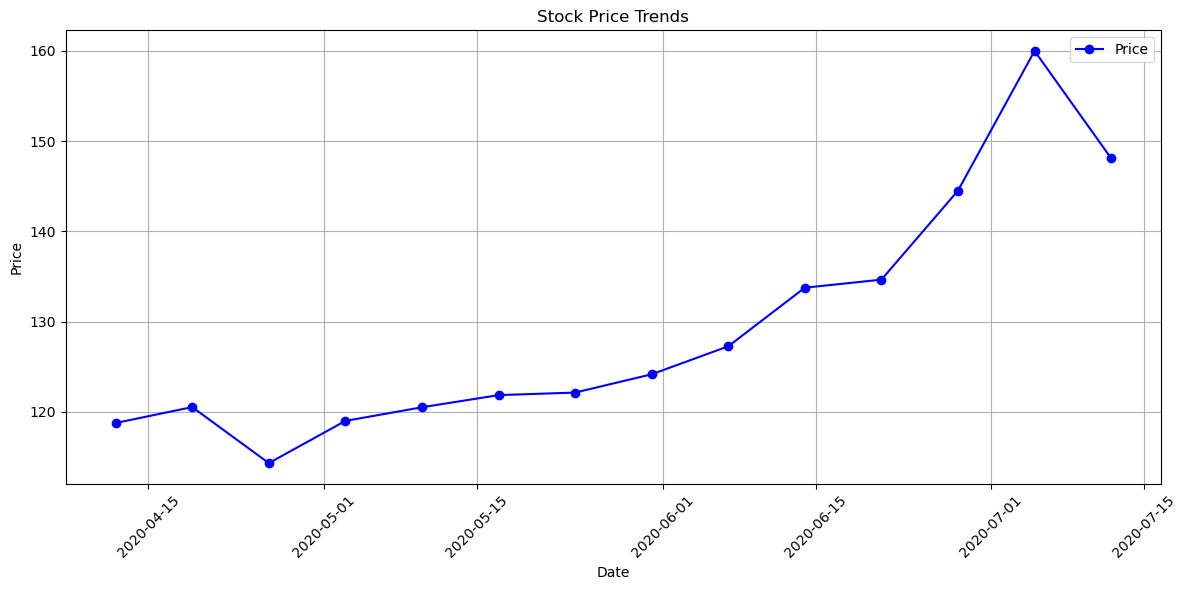

In [310]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from the CSV file
df = pd.read_csv('AMZN Historical Data.csv')  # Replace 'your_file.csv' with your actual file name

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Sort the DataFrame by date (if not already sorted)
df = df.sort_values(by='Date')

# Create a line plot for Price over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'], marker='o', linestyle='-', color='b', label='Price')
plt.title('Stock Price Trends')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


In [311]:
# Find the maximum and minimum prices
max_price = df['Price'].max()
min_price = df['Price'].min()


In [314]:
max_difference = max_price - min_price

In [316]:
max_difference

45.7

In [318]:
""" TO FIND THE CORELLATION BETWEEN THE TWEETS AND THE CHANGES IN STOCKS OF A PARTICULAR COMPANY WE WOULD NEED TO MANUALY GET THE INFORMATION
ABOUT THE STOCKS OF THE COMPANY THEN APPLY A REGRESSION MODEL TO  PREDICT THE CHANGES IN STOCKS ON TH EBASIS OF NUMBER OF POSITIVE AND NEGATIVE TWEETS PER DAY. """

' TO FIND THE CORELLATION BETWEEN THE TWEETS AND THE CHANGES IN STOCKS OF A PARTICULAR COMPANY WE WOULD NEED TO MANUALY GET THE INFORMATION\nABOUT THE STOCKS OF THE COMPANY THEN APPLY A REGRESSION MODEL TO  PREDICT THE CHANGES IN STOCKS ON TH EBASIS OF NUMBER OF POSITIVE AND NEGATIVE TWEETS PER DAY. '

In [320]:
""" AND ONLY THEN WE WOULD BE ABLE TO CHECK IF THE STOCKS OF A COMPANY FALL DUE TO NEGATIVE TWEETS ABOUT THE SAME."""

' AND ONLY THEN WE WOULD BE ABLE TO CHECK IF THE STOCKS OF A COMPANY FALL DUE TO NEGATIVE TWEETS ABOUT THE SAME.'